In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [28]:
#Read the data
data = pd.read_csv("50_startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [31]:
data1=data.copy()

In [33]:
data1['State']=data1['State'].astype('category')

In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.8 KB


In [35]:
data1[data1.duplicated()].shape

(0, 5)

In [51]:
data2 = data1.rename({'R&D Spend': 'RDspend'}, axis=1)
data2 = data1.rename({'Marketing Spend': 'Mspend'}, axis=1)
data2

,RDspend,Administration,Mspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [52]:
data2.describe()

,RDspend,Administration,Mspend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

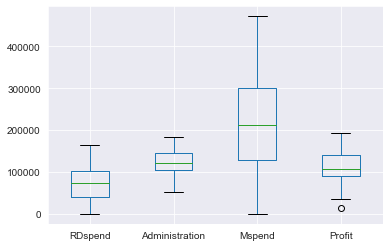

In [53]:
data2.boxplot()

<AxesSubplot:>

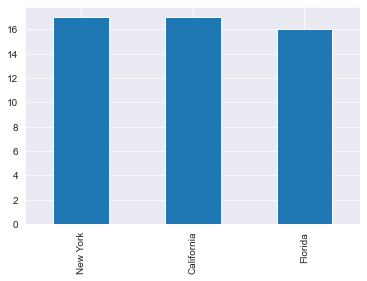

In [54]:
data2['State'].value_counts().plot.bar()

In [55]:
#check for missing values
data2.isna().sum()

RDspend           0
Administration    0
Mspend            0
State             0
Profit            0
dtype: int64

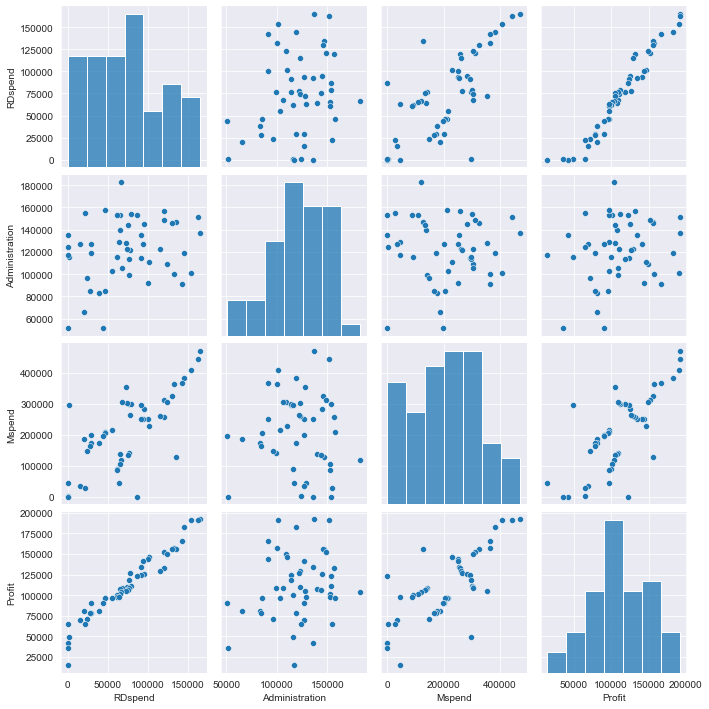

In [58]:
sns.set_style(style='darkgrid')
sns.pairplot(data2)


In [59]:
data2.corr()

,RDspend,Administration,Mspend,Profit
RDspend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Mspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [61]:
#Transformation 
#DUMMY VARIABLE
data3=pd.get_dummies(data2,columns=['State'])
data3

,RDspend,Administration,Mspend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [62]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [63]:
data3.values

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.9226183e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.9179206e+05,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.9105039e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.8290199e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.6618794e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.5699112e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.5612251e+05,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.5575260e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.2054252e+05, 1

In [67]:
array = data3.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:])
rescaledX


array([[1.        , 0.65174393, 1.        , 1.        , 0.        ,
        0.        , 1.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.99735461, 1.        ,
        0.        , 0.        ],
       [0.92798459, 0.37957895, 0.8646636 , 0.99317808, 0.        ,
        1.        , 0.        ],
       [0.87313643, 0.51299839, 0.81223513, 0.94729239, 0.        ,
        0.        , 1.        ],
       [0.85943772, 0.30532804, 0.77613557, 0.85317138, 0.        ,
        1.        , 0.        ],
       [0.797566  , 0.3694479 , 0.76912588, 0.80138177, 0.        ,
        0.        , 1.        ],
       [0.81412828, 0.73016111, 0.27071031, 0.79649041, 1.        ,
        0.        , 0.        ],
       [0.7880179 , 0.71745725, 0.68649342, 0.79440736, 0.        ,
        1.        , 0.        ],
       [0.72901786, 0.74173276, 0.66049977, 0.77446805, 0.        ,
        0.        , 1.        ],
       [0.74590551, 0.43692884, 0.64644319, 0.7606613 , 1.        ,
        0.        , 0. 

In [68]:
# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.   0.65 1.   1.   0.   0.   1.  ]
 [0.98 0.76 0.94 1.   1.   0.   0.  ]
 [0.93 0.38 0.86 0.99 0.   1.   0.  ]
 [0.87 0.51 0.81 0.95 0.   0.   1.  ]
 [0.86 0.31 0.78 0.85 0.   1.   0.  ]]


In [69]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [71]:
array = data3.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)
rescaledX

array([[ 2.02e+00,  5.61e-01,  2.15e+00,  2.01e+00, -7.18e-01, -6.86e-01,
         1.39e+00],
       [ 1.96e+00,  1.08e+00,  1.92e+00,  2.00e+00,  1.39e+00, -6.86e-01,
        -7.18e-01],
       [ 1.75e+00, -7.28e-01,  1.63e+00,  1.98e+00, -7.18e-01,  1.46e+00,
        -7.18e-01],
       [ 1.55e+00, -9.64e-02,  1.42e+00,  1.78e+00, -7.18e-01, -6.86e-01,
         1.39e+00],
       [ 1.50e+00, -1.08e+00,  1.28e+00,  1.36e+00, -7.18e-01,  1.46e+00,
        -7.18e-01],
       [ 1.28e+00, -7.76e-01,  1.25e+00,  1.13e+00, -7.18e-01, -6.86e-01,
         1.39e+00],
       [ 1.34e+00,  9.32e-01, -6.88e-01,  1.11e+00,  1.39e+00, -6.86e-01,
        -7.18e-01],
       [ 1.25e+00,  8.72e-01,  9.32e-01,  1.10e+00, -7.18e-01,  1.46e+00,
        -7.18e-01],
       [ 1.03e+00,  9.87e-01,  8.31e-01,  1.01e+00, -7.18e-01, -6.86e-01,
         1.39e+00],
       [ 1.09e+00, -4.57e-01,  7.76e-01,  9.46e-01,  1.39e+00, -6.86e-01,
        -7.18e-01],
       [ 6.20e-01, -3.88e-01,  1.50e-01,  8.55e-01, -7.18e-0

In [72]:
# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 2.02  0.56  2.15  2.01 -0.72 -0.69  1.39]
 [ 1.96  1.08  1.92  2.    1.39 -0.69 -0.72]
 [ 1.75 -0.73  1.63  1.98 -0.72  1.46 -0.72]
 [ 1.55 -0.1   1.42  1.78 -0.72 -0.69  1.39]
 [ 1.5  -1.08  1.28  1.36 -0.72  1.46 -0.72]]


In [75]:
data4 = pd.DataFrame(data3)
data4

,RDspend,Administration,Mspend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


# Correlation Matrix

In [76]:
data4.corr()

,RDspend,Administration,Mspend,Profit,State_California,State_Florida,State_New York
RDspend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Mspend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


# Scatterplot between variables along with histograms

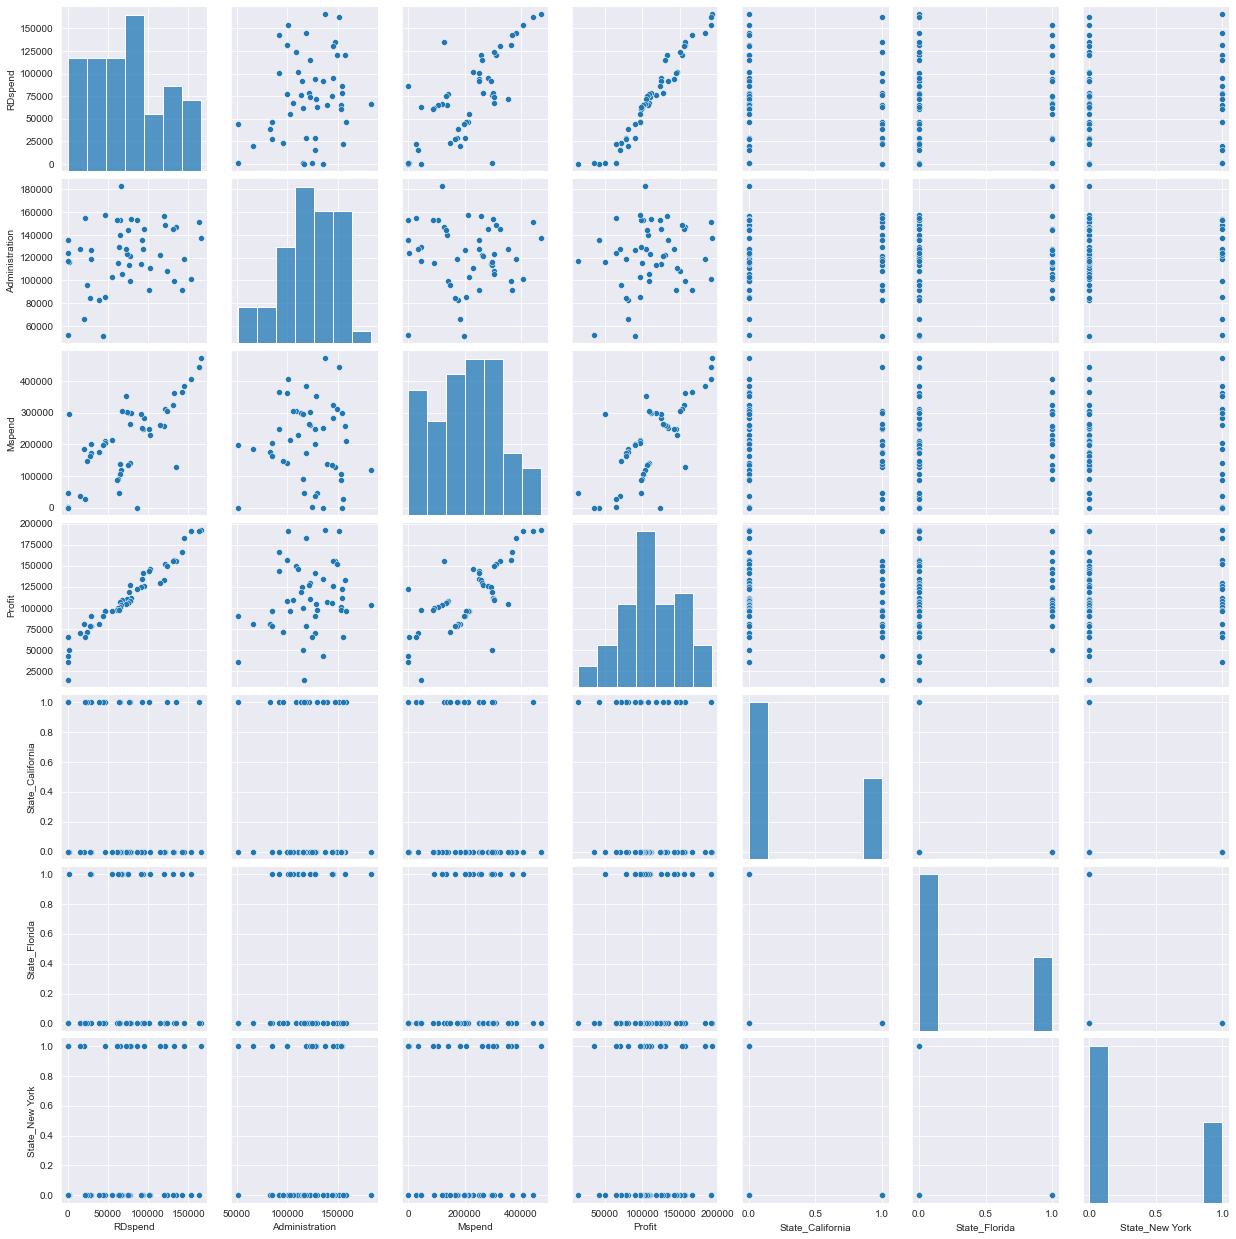

In [77]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data4)

In [81]:
data4 = data4.rename({'State_New York': 'State_NewYork'}, axis=1)
data4

,RDspend,Administration,Mspend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


# Preparing a model

In [84]:
    #Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDspend+Administration+Mspend+State_California+State_Florida+State_NewYork',data=data4).fit()

In [85]:
#Coefficients
model.params

Intercept           37633.233317
RDspend                 0.806023
Administration         -0.027004
Mspend                  0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NewYork       12450.223495
dtype: float64

In [87]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept            7.417409
RDspend             17.368580
Administration      -0.517012
Mspend               1.573889
State_California     5.099242
State_Florida        4.654306
State_NewYork        5.007401
dtype: float64 
 Intercept           2.807645e-09
RDspend             2.578772e-21
Administration      6.077373e-01
Mspend              1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NewYork       9.409010e-06
dtype: float64


In [92]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

# Simple Linear Regression Models

In [93]:
ml_v=smf.ols('Profit~Administration',data = data4).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [94]:
ml_w=smf.ols('Profit~Mspend',data = data4).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    7.808356
Mspend       7.802657
dtype: float64 
 Intercept    4.294735e-10
Mspend       4.381073e-10
dtype: float64


In [95]:
ml_wv=smf.ols('Profit~Administration+Mspend',data = data4).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept         1.142741
Administration    2.467779
Mspend            8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
Mspend            9.727245e-11
dtype: float64


# Calculating VIF

In [96]:
rsq_rdspend = smf.ols('RDspend~Administration+Mspend+State_California+State_Florida+State_NewYork',data=data4).fit().rsquared  
vif_rdspend = 1/(1-rsq_rdspend) 

rsq_admin = smf.ols('Administration~RDspend+Mspend+State_California+State_Florida+State_NewYork',data=data4).fit().rsquared  
vif_admin = 1/(1-rsq_admin)

rsq_mspend = smf.ols('Mspend~Administration+RDspend+State_California+State_Florida+State_NewYork',data=data4).fit().rsquared  
vif_mspend = 1/(1-rsq_mspend) 

rsq_stac = smf.ols('State_California~Mspend+Administration+RDspend+State_Florida+State_NewYork',data=data4).fit().rsquared  
vif_stac = 1/(1-rsq_stac)

rsq_staf = smf.ols('State_Florida~State_California+Mspend+Administration+RDspend+State_NewYork',data=data4).fit().rsquared  
vif_staf = 1/(1-rsq_staf)

rsq_stan = smf.ols('State_NewYork~State_Florida+State_California+Mspend+Administration+RDspend+State_NewYork',data=data4).fit().rsquared  
vif_stan = 1/(1-rsq_stan)

# Storing vif values in a data frame
d1 = {'Variables':['RDspend','Administration','Mspend','State_California','State_Florida','State_NewYork'],'VIF':[vif_rdspend,vif_admin,vif_mspend,vif_stac,vif_staf,vif_stan]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

<ipython-input-96-9dbb3d3f0797>:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_stac = 1/(1-rsq_stac)
<ipython-input-96-9dbb3d3f0797>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_staf = 1/(1-rsq_staf)
<ipython-input-96-9dbb3d3f0797>:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_stan = 1/(1-rsq_stan)


,Variables,VIF
0,RDspend,2.495511
1,Administration,1.177766
2,Mspend,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_NewYork,inf


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

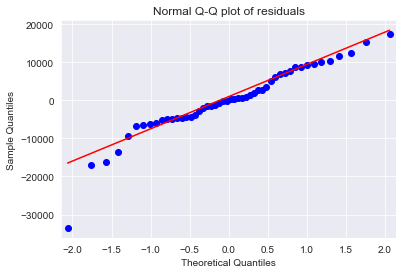

In [97]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [98]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [99]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

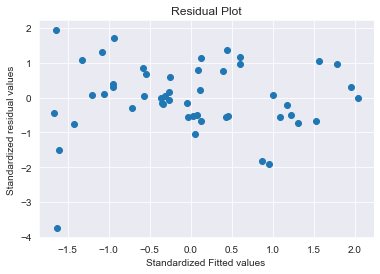

In [100]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

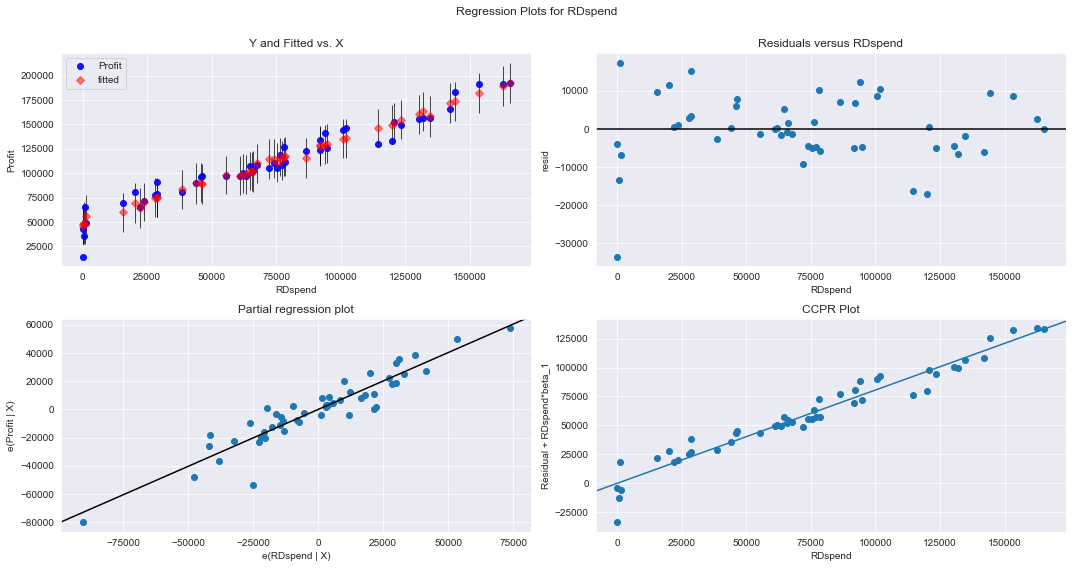

In [102]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDspend", fig=fig)
plt.show()

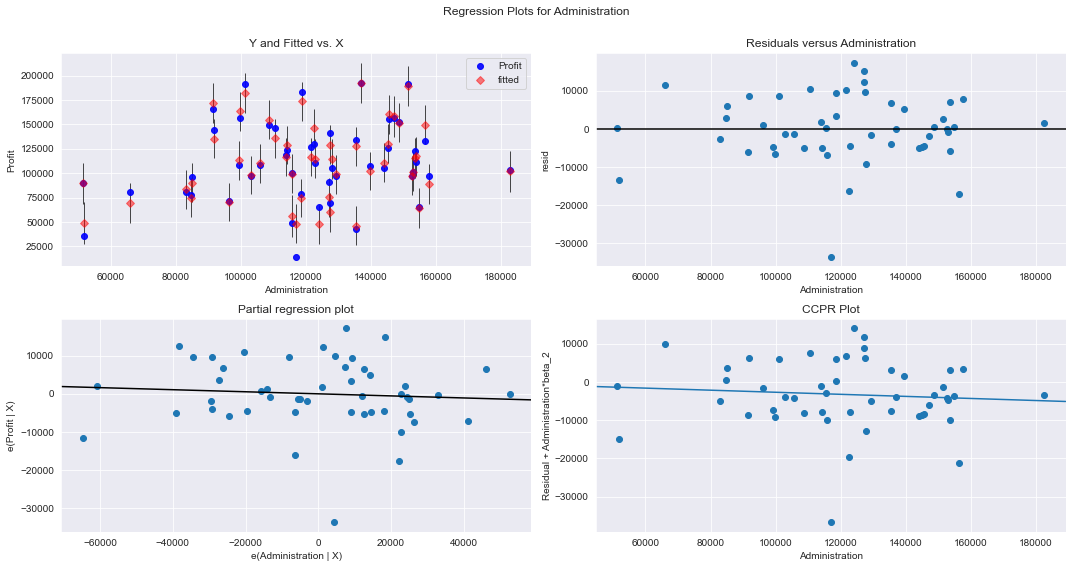

In [103]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

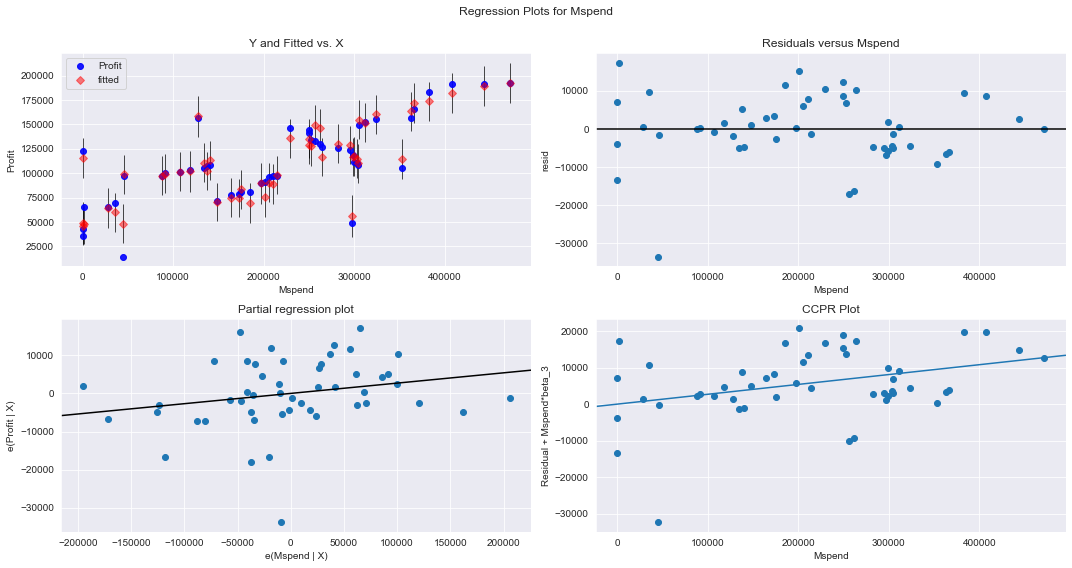

In [104]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Mspend", fig=fig)
plt.show()

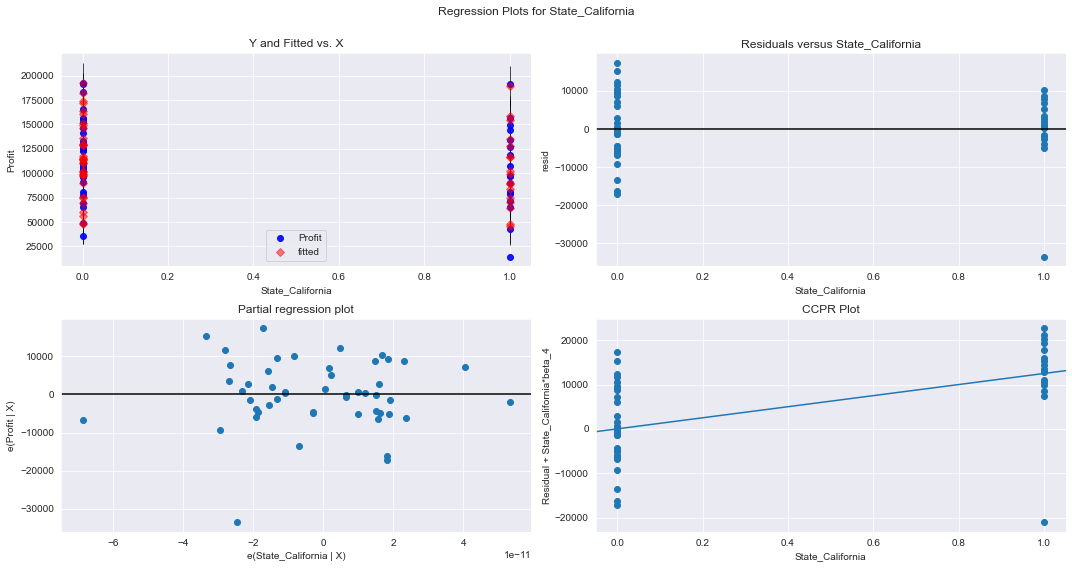

In [105]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State_California", fig=fig)
plt.show()

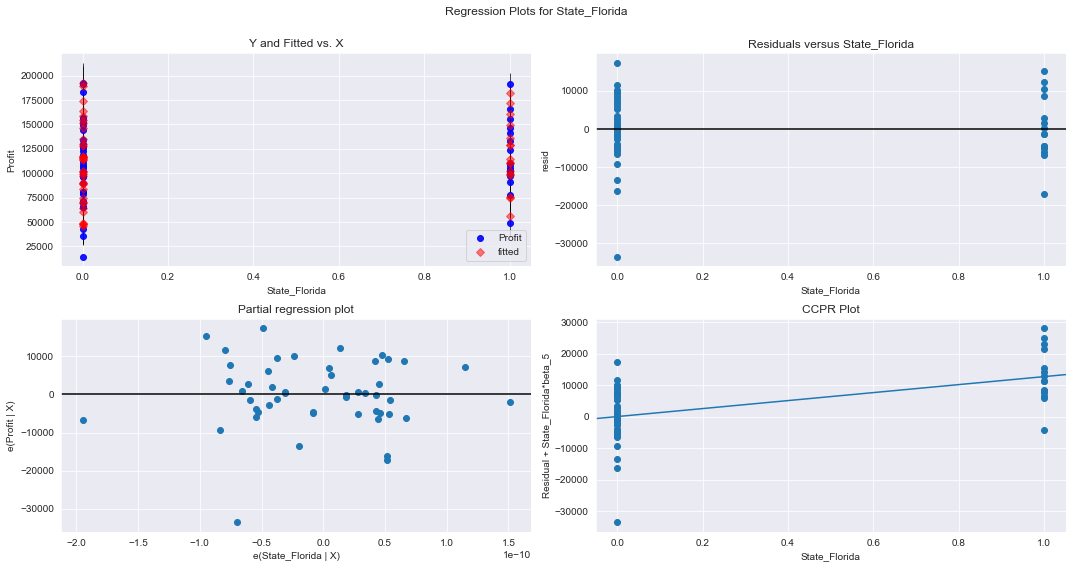

In [107]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State_Florida", fig=fig)
plt.show()

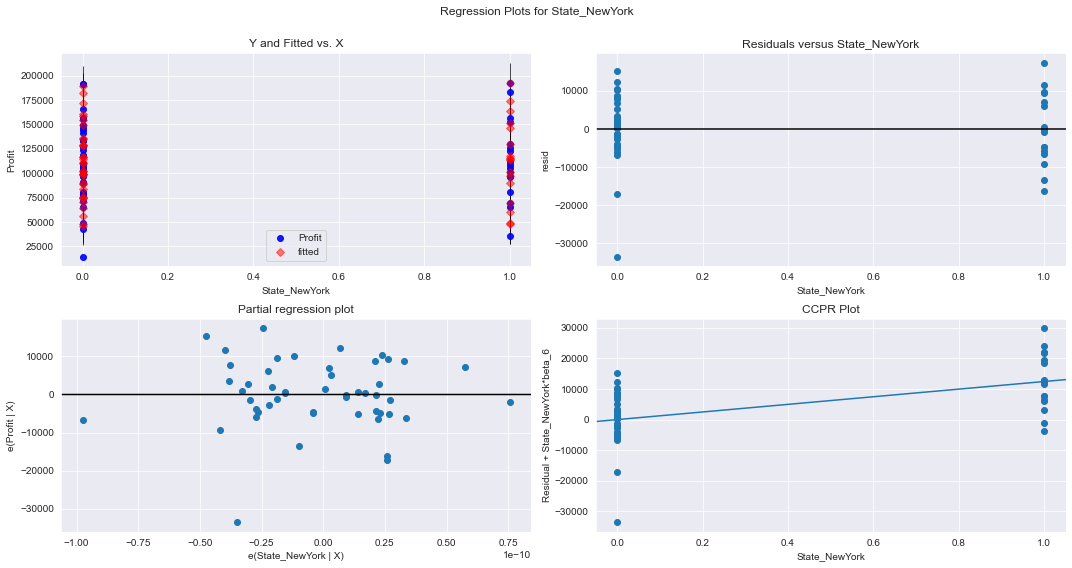

In [108]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State_NewYork", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [109]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

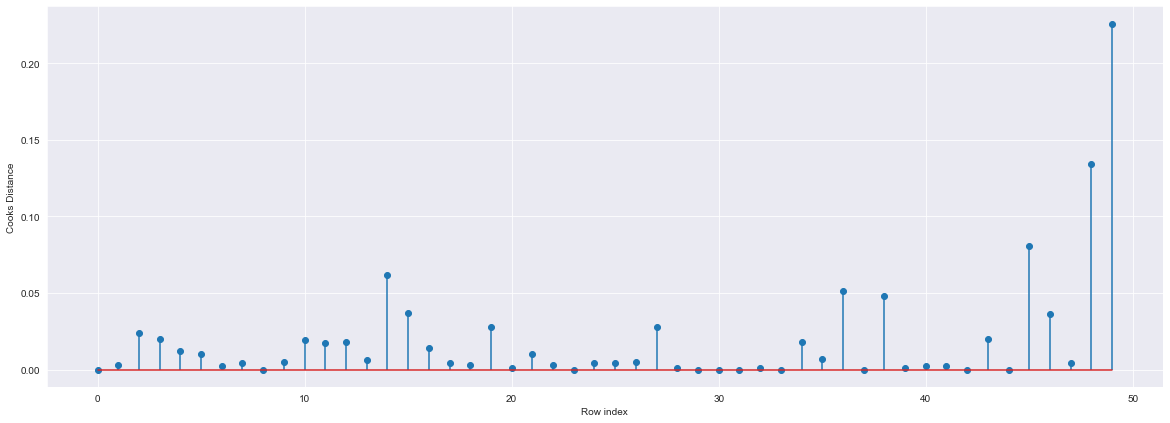

In [112]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [113]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2262509450150923)

## High Influence points

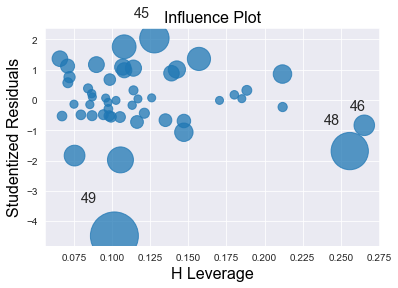

In [114]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [129]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [131]:
data[data.index.isin([45, 46, 48, 49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [130]:
#See the differences in HP and other variable values
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [150]:
#Load the data
data_new = pd.read_csv("50_Startups.csv")

In [151]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data_new.drop(data_new.index[[45, 46, 48, 49]],axis=0).reset_index()

In [152]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

In [175]:
data1

,RDspend,Administration,Mspend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


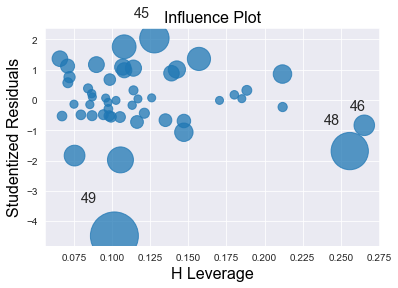

In [161]:
data1=pd.get_dummies(data2,columns=['State'])
data1 = data1.rename({'R&D Spend': 'RDspend'}, axis=1)
data1 = data1.rename({'Marketing Spend': 'Mspend'}, axis=1)
data1 = data1.rename({'State_New York': 'State_NewYork'}, axis=1)
data1

,RDspend,Administration,Mspend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


# Build Model

In [162]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~RDspend+Administration+Mspend+State_California+State_Florida+State_NewYork',data = data1).fit()

In [163]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9629967080989382, 953.5652477713251)

## Predicting for new data

In [170]:
final_ml_V.predict(data1.iloc[0:5,])

0    189568.101576
1    187643.132097
2    181248.361453
3    171792.808694
4    171811.771966
dtype: float64

In [167]:
pred_y = final_ml_V.predict(data1)

In [168]:
pred_y

0     189568.101576
1     187643.132097
2     181248.361453
3     171792.808694
4     171811.771966
5     162538.847300
6     157277.643058
7     158668.382488
8     149781.300151
9     155580.632740
10    135862.224691
11    137376.464133
12    129354.945855
13    128475.375644
14    148183.224301
15    145075.757402
16    118722.882278
17    129138.489181
18    129680.626071
19    114331.341671
20    118736.819270
21    116596.520381
22    115745.748852
23    111677.716300
24    113885.733893
25    103891.627402
26    110873.656972
27    114601.849800
28    101247.886453
29    101299.773232
30    100833.409400
31     97326.534690
32    100857.271462
33     99959.802663
34     90910.788477
35     92478.017581
36     77588.045406
37     94236.837561
38     72966.375791
39     87703.118189
40     78211.201261
41     78157.837129
42     74719.745042
43     61878.648657
44     67150.439075
45     50212.602301
dtype: float64

In [173]:
print(final_ml_V.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     208.2
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.62e-27
Time:                        00:38:08   Log-Likelihood:                -470.78
No. Observations:                  46   AIC:                             953.6
Df Residuals:                      40   BIC:                             964.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.228e+04   4468.067  